Plots sea ice trends for March and September on EASE grid

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [116]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os, glob

import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Get Data

In [96]:
diri = '/disks/sidads_ftp/pub/incoming/julienne'
marTrend = np.fromfile(os.path.join(diri,'mar_trends.1979-2016.EASE'),dtype='float32').reshape(361,361)
marSignf = np.fromfile(os.path.join(diri,'mar_sign.1979-2016.EASE'),dtype='float32').reshape(361,361)
sepTrend = np.fromfile(os.path.join(diri,'sep_trends.1979-2016.EASE'),dtype='float32').reshape(361,361)
sepSignf = np.fromfile(os.path.join(diri,'sep_sign.1979-2016.EASE'),dtype='float32').reshape(361,361)

# Set region north of 84N to missing
marTrend = np.where(lat > 84., np.nan, marTrend)
marSignf = np.where((lat > 84), np.nan, marSignf)*100.
sepTrend = np.where(lat > 84., np.nan, sepTrend)
sepSignf = np.where((lat > 84), np.nan, sepSignf)*100.

## Get coordinates

In [27]:
gdiri = '/oldhome/apbarret/projects/ancillary/maps'
lon = np.fromfile(os.path.join(gdiri,'xcenter.Na25.361x361x1.float'), dtype='float32').reshape(361,361)
lat = np.fromfile(os.path.join(gdiri,'ycenter.Na25.361x361x1.float'), dtype='float32').reshape(361,361)

In [117]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=-1):
    if n == -1:
        n = cmap.N
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
         'trunc({name},{a:.2f},{b:.2f})'.format(name=cmap.name, a=minval, b=maxval),
         cmap(np.linspace(minval, maxval, n)))
    return new_cmap

## Make plot

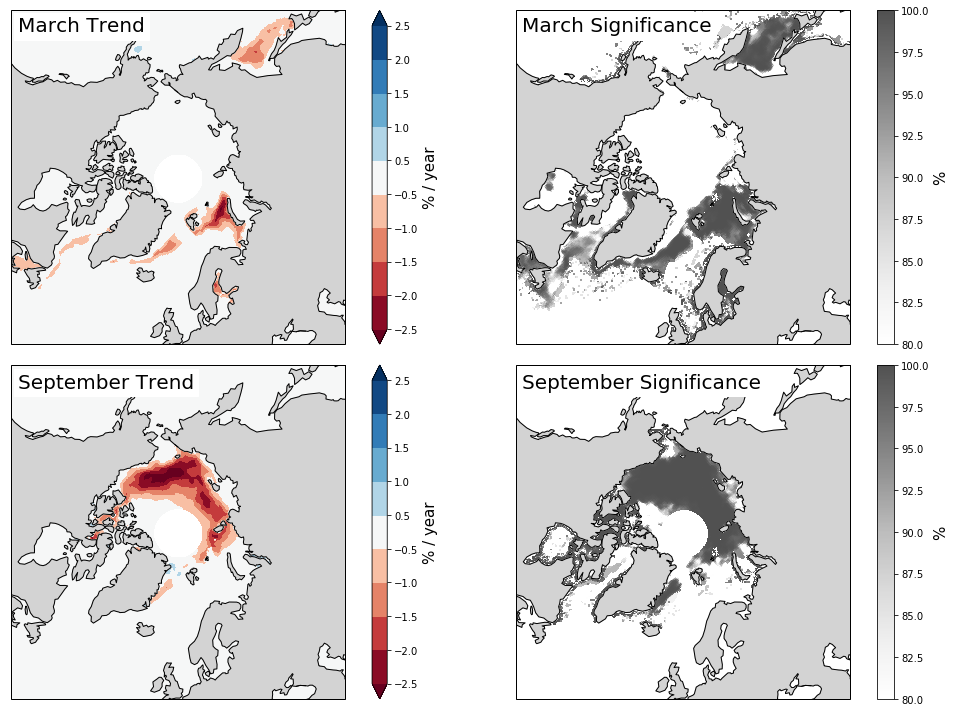

In [121]:
map_proj = ccrs.NorthPolarStereo()

coords = map_proj.transform_points(ccrs.PlateCarree(), lon, lat)

trndLevels = np.array([-2.5,-2.,-1.5,-1,-0.5,0.5,1.,1.5,2.,2.5]) #np.linspace(-2.5,2.5,11)
signLevels = np.array([0.8,0.85,0.9,0.95,1.]) #np.linspace(0.,1.,11)
cmap = 'RdBu'

sig_cmap = truncate_colormap(plt.get_cmap('Greys'), 0., 0.75)

fig = plt.figure(figsize=(15,10))

ax1 = plt.subplot(2,2,1,projection=map_proj)
ax1.set_extent([-180.,180.,50.,90.], ccrs.PlateCarree())
cs1 = ax1.contourf(coords[:,:,0], coords[:,:,1], marTrend, levels=trndLevels, extend='both', cmap=cmap)
cbar1 = plt.colorbar(cs1, ax=ax1)
cbar1.ax.set_ylabel('% / year', fontsize=15)
ax1.add_feature(cfeature.LAND, facecolor='lightgrey')
ax1.coastlines()
plt.figtext(0.11, 0.95, 'March Trend', fontsize=20, backgroundcolor='w')

ax2 = plt.subplot(2,2,2,projection=map_proj)
ax2.set_extent([-180.,180.,50.,90.], ccrs.PlateCarree())
#cs2 = ax2.contourf(coords[:,:,0], coords[:,:,1], marSignf, levels=signLevels, cmap='Greys')
cs2 = ax2.pcolormesh(coords[:,:,0], coords[:,:,1], marSignf, vmin=80., vmax=100., cmap=sig_cmap)
cbar2 = plt.colorbar(cs2, ax=ax2)
cbar2.ax.set_ylabel('%', fontsize=15)
ax2.add_feature(cfeature.LAND, facecolor='lightgrey')
ax2.coastlines()
plt.figtext(0.577, 0.95, 'March Significance', fontsize=20, backgroundcolor='w')

ax3 = plt.subplot(2,2,3,projection=map_proj)
ax3.set_extent([-180.,180.,50.,90.], ccrs.PlateCarree())
cs3 = ax3.contourf(coords[:,:,0], coords[:,:,1], sepTrend, levels=trndLevels, extend='both', cmap=cmap)
cbar3 = plt.colorbar(cs3, ax=ax3)
cbar3.ax.set_ylabel('% / year', fontsize=15)
ax3.add_feature(cfeature.LAND, facecolor='lightgrey')
ax3.coastlines()
plt.figtext(0.11, 0.455, 'September Trend', fontsize=20, backgroundcolor='w')

ax4 = plt.subplot(2,2,4,projection=map_proj)
ax4.set_extent([-180.,180.,50.,90.], ccrs.PlateCarree())
#cs4 = ax4.contourf(coords[:,:,0], coords[:,:,1], sepSignf, levels=signLevels, cmap='Greys')
cs4 = ax4.pcolormesh(coords[:,:,0], coords[:,:,1], sepSignf, vmin=80., vmax=100., cmap=sig_cmap)
cbar4 = plt.colorbar(cs4, ax=ax4)
cbar4.ax.set_ylabel('%', fontsize=15)
ax4.add_feature(cfeature.LAND, facecolor='lightgrey')
ax4.coastlines()
plt.figtext(0.577, 0.455, 'September Significance', fontsize=20, backgroundcolor='w')

plt.tight_layout()

plt.savefig('mar_sep_sic_trends.png')